<a href="https://colab.research.google.com/github/jbarker6706/Portfolio8/blob/master/VGG16TurtleBot3_Hamburger_or_Waffle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

# load the model
model = Sequential()
model.add(VGG16(include_top=False, input_shape=(224,224,3)))

model.add(Flatten())
model.add(Dense(2))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 50178     
Total params: 14,764,866
Trainable params: 14,764,866
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import models
from keras import layers
from keras import optimizers

from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)



<keras.engine.input_layer.InputLayer object at 0x7f20252b05c0> False
<keras.layers.convolutional.Conv2D object at 0x7f20259ea908> False
<keras.layers.convolutional.Conv2D object at 0x7f2025979630> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2025982ac8> False
<keras.layers.convolutional.Conv2D object at 0x7f202598e2b0> False
<keras.layers.convolutional.Conv2D object at 0x7f20259985f8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f202599d898> False
<keras.layers.convolutional.Conv2D object at 0x7f20259aa0b8> False
<keras.layers.convolutional.Conv2D object at 0x7f202599a400> False
<keras.layers.convolutional.Conv2D object at 0x7f2025939668> False
<keras.layers.pooling.MaxPooling2D object at 0x7f20259495f8> False
<keras.layers.convolutional.Conv2D object at 0x7f202594ce48> False
<keras.layers.convolutional.Conv2D object at 0x7f2025955eb8> False
<keras.layers.convolutional.Conv2D object at 0x7f20259609b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2025965e80>

In [0]:
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 2050      
Total params: 40,407,874
Trainable params: 32,772,610
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = './train/'
validation_dir = './validation/'
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)


Found 96 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('vgg16_tb3_burger_waffle.h5')



Epoch 1/30
1/0 [===============================] - 6s 6s/step - loss: 0.8788 - acc: 0.4896 - val_loss: 0.0000e+00 - val_acc: 0.4444
Epoch 2/30
1/0 [===============================] - 0s 298ms/step - loss: 8.3580 - acc: 0.5000 - val_loss: 2.3172 - val_acc: 0.5556
Epoch 3/30
1/0 [===============================] - 1s 958ms/step - loss: 1.2327 - acc: 0.5000 - val_loss: 0.0525 - val_acc: 0.4444
Epoch 4/30
1/0 [===============================] - 1s 877ms/step - loss: 1.4374 - acc: 0.5000 - val_loss: 0.5913 - val_acc: 0.6667
Epoch 5/30
1/0 [===============================] - 1s 880ms/step - loss: 0.7497 - acc: 0.5312 - val_loss: 0.6506 - val_acc: 0.7778
Epoch 6/30
1/0 [===============================] - 1s 915ms/step - loss: 0.6716 - acc: 0.5521 - val_loss: 0.5310 - val_acc: 0.5556
Epoch 7/30
1/0 [===============================] - 1s 896ms/step - loss: 0.7076 - acc: 0.5312 - val_loss: 0.6190 - val_acc: 0.7778
Epoch 8/30
1/0 [===============================] - 1s 881ms/step - loss: 0.6627 -

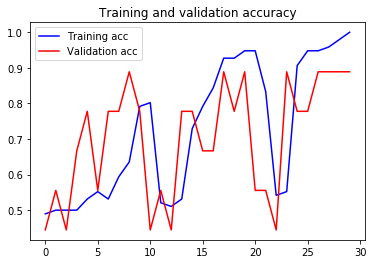

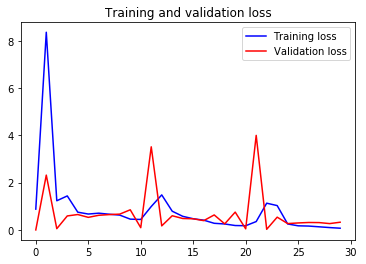

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

Found 18 images belonging to 2 classes.
2/1 [=================================] - 0s 110ms/step
No of errors = 2/18


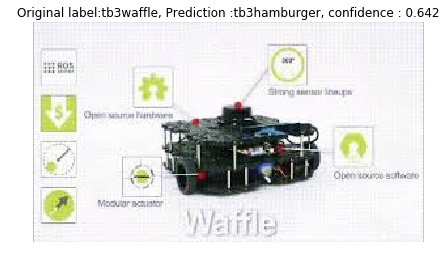

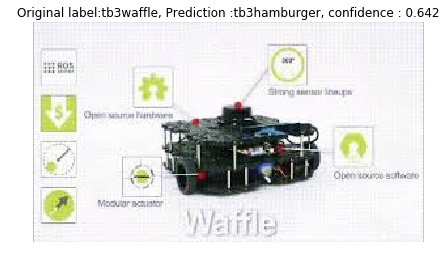

In [0]:
import numpy as np

# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()